### 1. Data Loading and Exploration

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

plt.style.use('ggplot')
%matplotlib inline

In [ ]:
column_names = [
    'unit_number', 'time_cycles', 
    'operational_setting_1', 'operational_setting_2', 'operational_setting_3',
    'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 
    'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10',
    'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
    'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
    'sensor_21'
]

train_fd001 = pd.read_csv('train_FD002.txt', sep='\s+', header=None, names=column_names)

In [ ]:
print("First 5 rows of the dataset:")
display(train_fd001.head())

print(f"\nDataset shape: {train_fd001.shape}")

print("\nBasic statistics:")
display(train_fd001.describe())

print("\nMissing values per column:")
print(train_fd001.isnull().sum())

print(f"\nNumber of unique engine units: {train_fd001['unit_number'].nunique()}")

First 5 rows of the dataset:


,unit_number,time_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286



Dataset shape: (53759, 26)

Basic statistics:


,unit_number,time_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
count,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,...,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000
mean,131.082981,109.154746,23.998407,0.572056,94.046020,472.910207,579.672399,1419.971013,1205.442024,8.031986,...,266.069034,2334.557253,8066.597682,9.329654,0.023326,348.309511,2228.806358,97.756838,20.789296,12.473423
std,74.463862,69.180569,14.747376,0.310016,14.237735,26.389707,37.289399,105.946341,119.123428,3.613839,...,137.659507,128.068271,84.837950,0.749335,0.004711,27.754515,145.327980,5.364067,9.869331,5.921615
min,1.000000,1.000000,0.000000,0.000000,60.000000,445.000000,535.530000,1243.730000,1023.770000,3.910000,...,129.120000,2027.610000,7848.360000,8.335700,0.020000,303.000000,1915.000000,84.930000,10.180000,6.010500
25%,68.000000,52.000000,10.004600,0.250700,100.000000,445.000000,549.570000,1352.760000,1123.655000,3.910000,...,131.520000,2387.900000,8062.140000,8.677800,0.020000,331.000000,2212.000000,100.000000,10.910000,6.546300
50%,131.000000,104.000000,25.001300,0.700000,100.000000,462.540000,555.980000,1369.180000,1138.890000,7.050000,...,183.200000,2388.080000,8082.540000,9.310900,0.020000,335.000000,2223.000000,100.000000,14.880000,8.929200
75%,195.000000,157.000000,41.998000,0.840000,100.000000,491.190000,607.340000,1499.370000,1306.850000,10.520000,...,371.260000,2388.170000,8127.195000,9.386900,0.030000,369.000000,2324.000000,100.000000,28.470000,17.083200
max,260.000000,378.000000,42.008000,0.842000,100.000000,518.670000,644.520000,1612.880000,1439.230000,14.620000,...,523.370000,2390.480000,8268.500000,11.066900,0.030000,399.000000,2388.000000,100.000000,39.340000,23.590100



Missing values per column:
unit_number              0
time_cycles              0
operational_setting_1    0
operational_setting_2    0
operational_setting_3    0
sensor_1                 0
sensor_2                 0
sensor_3                 0
sensor_4                 0
sensor_5                 0
sensor_6                 0
sensor_7                 0
sensor_8                 0
sensor_9                 0
sensor_10                0
sensor_11                0
sensor_12                0
sensor_13                0
sensor_14                0
sensor_15                0
sensor_16                0
sensor_17                0
sensor_18                0
sensor_19                0
sensor_20                0
sensor_21                0
dtype: int64

Number of unique engine units: 260


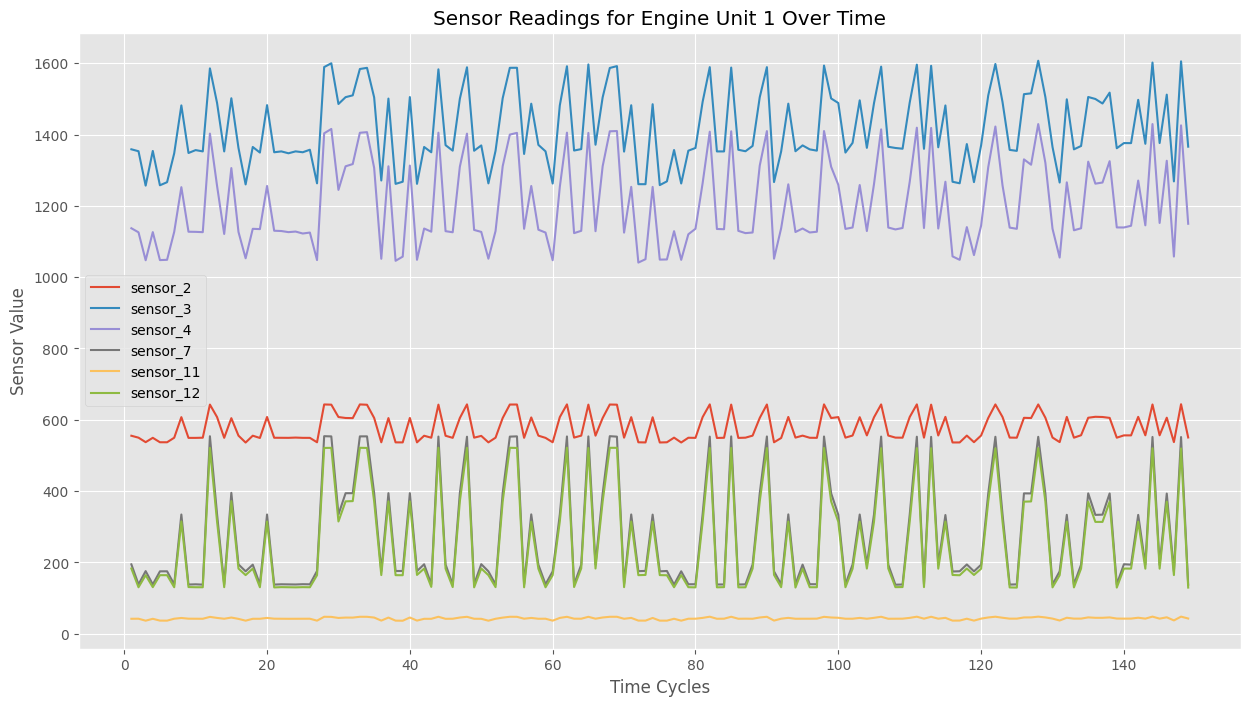

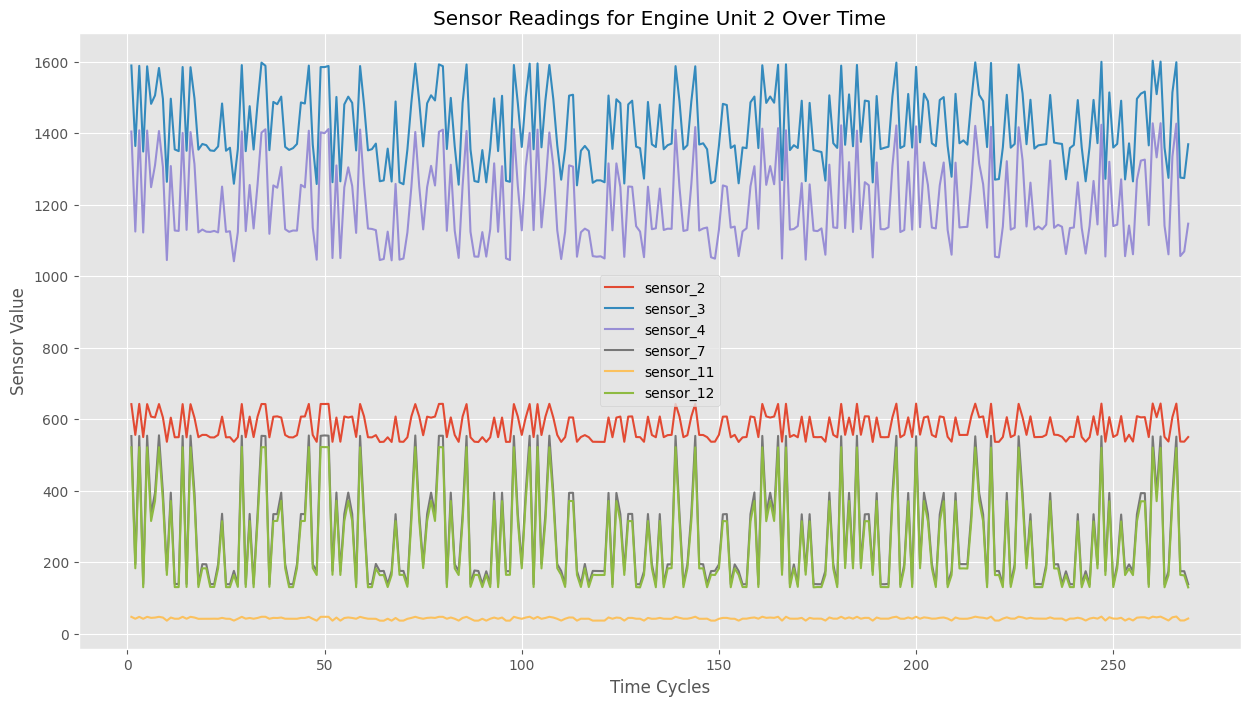

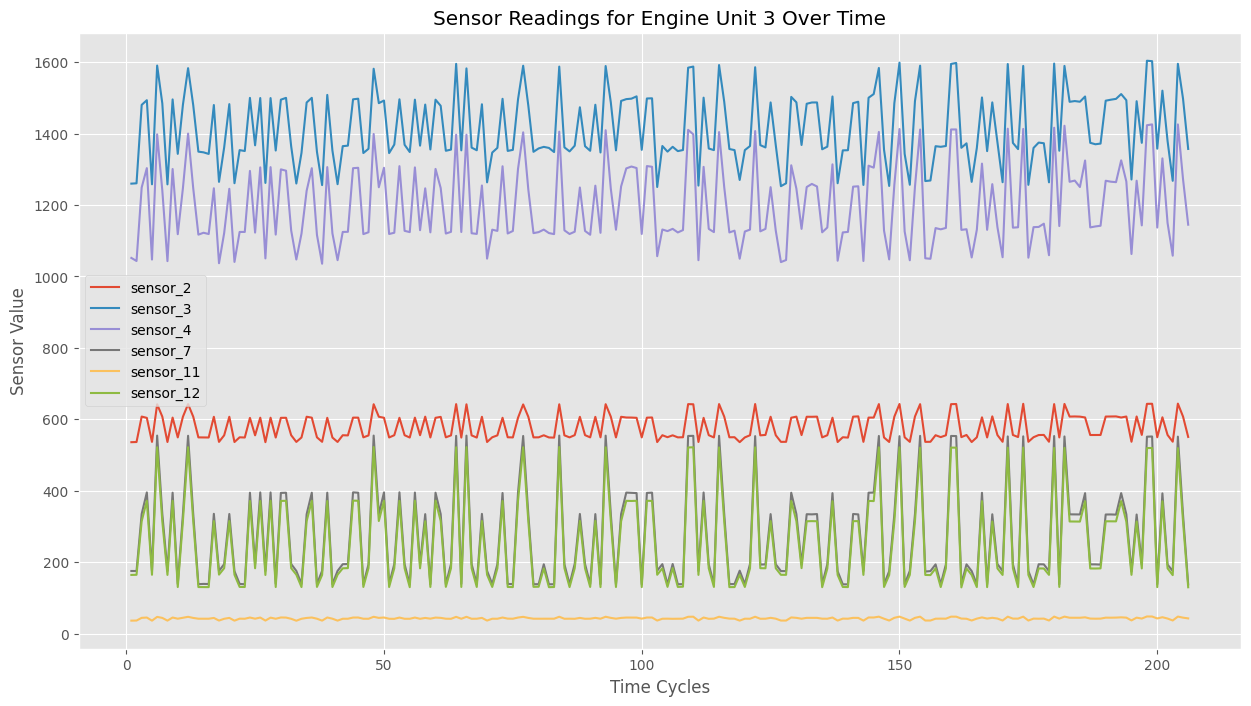

In [ ]:
def plot_sensors(unit_num, sensors_to_plot, df):
    """Plot sensor readings for a specific engine unit"""
    engine_data = df[df['unit_number'] == unit_num]
    plt.figure(figsize=(15, 8))
    
    for sensor in sensors_to_plot:
        plt.plot(engine_data['time_cycles'], engine_data[sensor], label=sensor)
    
    plt.title(f'Sensor Readings for Engine Unit {unit_num} Over Time')
    plt.xlabel('Time Cycles')
    plt.ylabel('Sensor Value')
    plt.legend()
    plt.show()

sensors_subset = ['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_11', 'sensor_12']
for unit in [1, 2, 3]:
    plot_sensors(unit, sensors_subset, train_fd001)

Average lifespan: 206.8 cycles
Minimum lifespan: 128 cycles
Maximum lifespan: 378 cycles


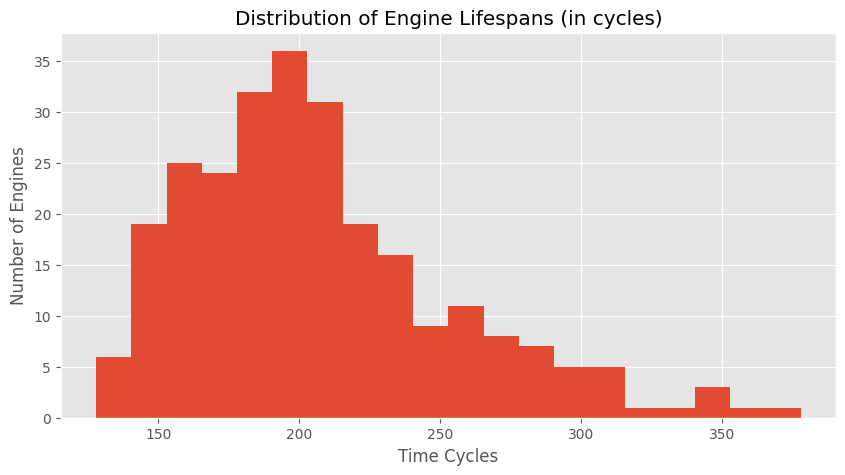

In [ ]:
cycle_counts = train_fd001.groupby('unit_number')['time_cycles'].max()
print(f"Average lifespan: {cycle_counts.mean():.1f} cycles")
print(f"Minimum lifespan: {cycle_counts.min()} cycles")
print(f"Maximum lifespan: {cycle_counts.max()} cycles")

plt.figure(figsize=(10, 5))
plt.hist(cycle_counts, bins=20)
plt.title('Distribution of Engine Lifespans (in cycles)')
plt.xlabel('Time Cycles')
plt.ylabel('Number of Engines')
plt.show()

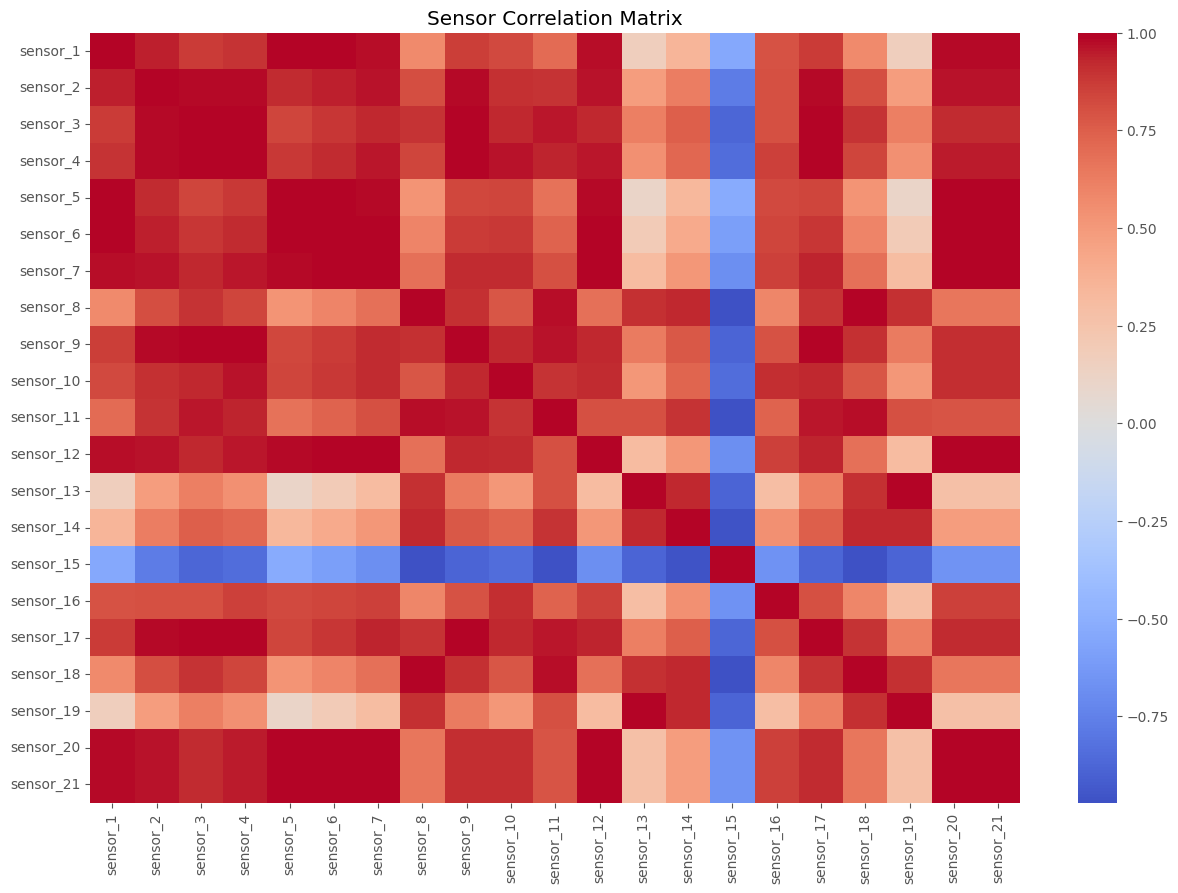

In [ ]:
corr_matrix = train_fd001.iloc[:, 5:].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Sensor Correlation Matrix')
plt.show()

### 2. Data Preprocessing

In [40]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [ ]:
train_data = train_fd001.copy()

def remove_constant_sensors(df, threshold=0.01):
    """Remove sensors with very low variance"""
    selector = VarianceThreshold(threshold=threshold)
    sensor_data = df.iloc[:, 5:]  # Select only sensor columns
    selector.fit(sensor_data)
    constant_mask = ~selector.get_support()
    constant_sensors = sensor_data.columns[constant_mask]
    print(f"Removing {len(constant_sensors)} nearly-constant sensors: {list(constant_sensors)}")
    return df.drop(columns=constant_sensors)

train_data = remove_constant_sensors(train_data)

Removing 1 nearly-constant sensors: ['sensor_16']


In [ ]:
def normalize_data(df, scaler_type='minmax'):
    """Normalize sensor data"""
    sensor_cols = [col for col in df.columns if 'sensor_' in col]
    
    if scaler_type == 'minmax':
        scaler = MinMaxScaler(feature_range=(-1, 1))
    else:
        scaler = StandardScaler()
    
    df[sensor_cols] = scaler.fit_transform(df[sensor_cols])
    
    import joblib
    joblib.dump(scaler, f'{scaler_type}_scaler.save')
    
    return df, scaler

train_data, scaler = normalize_data(train_data, scaler_type='standard')
print("\nNormalized sensor data (first 5 rows):")
display(train_data.iloc[:5, 5:10])  # Show first 5 rows of first 5 sensors


Normalized sensor data (first 5 rows):


,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,-0.889378,-0.653071,-0.579176,-0.572622,-0.706177
1,-1.057627,-0.798422,-0.630051,-0.668741,-1.140622
2,-0.392968,-1.136055,-1.540521,-1.326301,-0.271732
3,-1.057627,-0.808881,-0.622406,-0.663705,-1.140622
4,-0.392968,-1.142491,-1.531554,-1.322271,-0.271732


In [ ]:
def create_sequences(data, sequence_length=50, step=1):
    """Convert time series data into sequences for LSTM"""
    sequences = []
    unit_numbers = data['unit_number'].unique()
    
    for unit in unit_numbers:
        unit_data = data[data['unit_number'] == unit]
        sensor_cols = [col for col in unit_data.columns if 'sensor_' in col]
        sensor_values = unit_data[sensor_cols].values
        
        for i in range(0, len(sensor_values) - sequence_length, step):
            sequences.append(sensor_values[i:i + sequence_length])
    
    return np.array(sequences)

sequence_length = 30  
step_size = 5         
sequences = create_sequences(train_data, sequence_length, step_size)

print(f"\nCreated {len(sequences)} sequences with shape {sequences.shape}")


Created 9294 sequences with shape (9294, 30, 20)


In [ ]:
train_seq, val_seq = train_test_split(sequences, test_size=0.2, random_state=42)

print(f"Training sequences: {train_seq.shape}")
print(f"Validation sequences: {val_seq.shape}")

Training sequences: (7435, 30, 20)
Validation sequences: (1859, 30, 20)


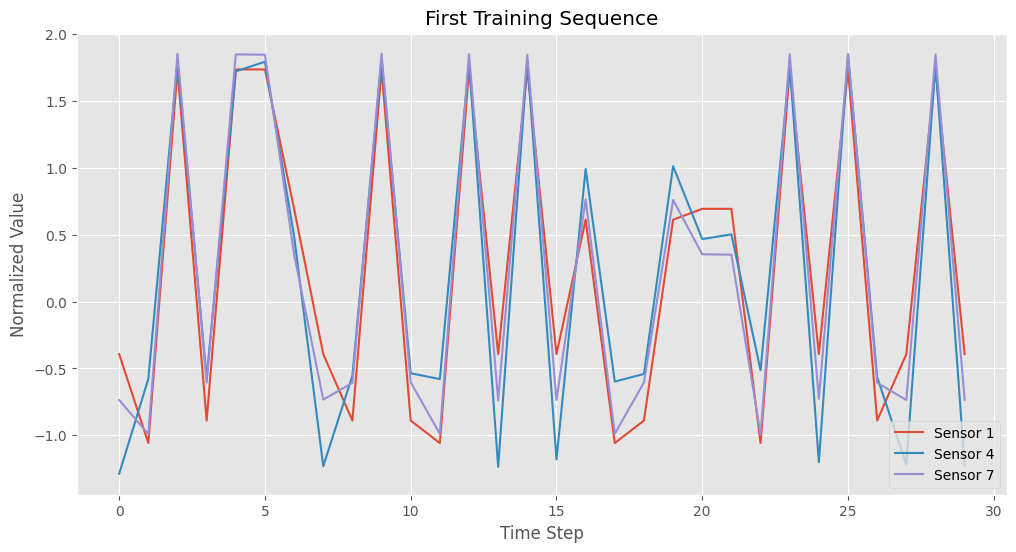

In [ ]:
def plot_sequence(sequence, sensor_indices=[0, 1, 2], title="Sample Sequence"):
    plt.figure(figsize=(12, 6))
    for i in sensor_indices:
        plt.plot(sequence[:, i], label=f'Sensor {i+1}')
    plt.title(title)
    plt.xlabel('Time Step')
    plt.ylabel('Normalized Value')
    plt.legend()
    plt.show()

plot_sequence(train_seq[0], sensor_indices=[0, 3, 6], title="First Training Sequence")

In [ ]:
np.save('train_sequences.npy', train_seq)
np.save('val_sequences.npy', val_seq)

sensor_cols = [col for col in train_data.columns if 'sensor_' in col]
pd.Series(sensor_cols).to_csv('remaining_sensor_columns.csv', index=False)

### 3. Building the LSTM Autoencoder Model

In [47]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [ ]:
def build_lstm_autoencoder(input_shape, latent_dim=32, lstm_units=[64, 32]):
    """
    Build LSTM Autoencoder model
    
    Args:
        input_shape: (sequence_length, num_features)
        latent_dim: Dimension of the bottleneck layer
        lstm_units: List of units for encoder/decoder LSTM layers
    
    Returns:
        model: Compiled LSTM Autoencoder
    """
    inputs = Input(shape=input_shape)
    
    x = LSTM(lstm_units[0], activation='tanh', return_sequences=True)(inputs)
    x = LSTM(lstm_units[1], activation='tanh', return_sequences=False)(x)
    
    latent = Dense(latent_dim, activation='tanh')(x)
    
    x = RepeatVector(input_shape[0])(latent)
    
    x = LSTM(lstm_units[1], activation='tanh', return_sequences=True)(x)
    x = LSTM(lstm_units[0], activation='tanh', return_sequences=True)(x)
    
    outputs = TimeDistributed(Dense(input_shape[1]))(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    
    return model

input_shape = (train_seq.shape[1], train_seq.shape[2])

model = build_lstm_autoencoder(input_shape, latent_dim=32, lstm_units=[64, 32])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 30, 20)]          0         
                                                                 
 lstm_7 (LSTM)               (None, 30, 64)            21760     
                                                                 
 lstm_8 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 repeat_vector_2 (RepeatVect  (None, 30, 32)           0         
 or)                                                             
                                                                 
 lstm_9 (LSTM)               (None, 30, 32)            8320      
                                                           

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1),
    ModelCheckpoint('best_lstm_autoencoder.h5', monitor='val_loss', 
                   save_best_only=True, mode='min', verbose=1)
]

In [ ]:
batch_size = 64
epochs = 50

history = model.fit(
    train_seq, train_seq,
    validation_data=(val_seq, val_seq),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callbacks,
    shuffle=True
)

Epoch 1/50
117/117 [==============================] - ETA: 0s - loss: 0.9537
Epoch 1: val_loss improved from inf to 0.92798, saving model to best_lstm_autoencoder.h5
117/117 [==============================] - 16s 70ms/step - loss: 0.9537 - val_loss: 0.9280
Epoch 2/50
116/117 [============================>.] - ETA: 0s - loss: 0.9132
Epoch 2: val_loss improved from 0.92798 to 0.90125, saving model to best_lstm_autoencoder.h5
117/117 [==============================] - 6s 51ms/step - loss: 0.9132 - val_loss: 0.9013
Epoch 3/50
116/117 [============================>.] - ETA: 0s - loss: 0.8863
Epoch 3: val_loss improved from 0.90125 to 0.87339, saving model to best_lstm_autoencoder.h5
117/117 [==============================] - 6s 53ms/step - loss: 0.8863 - val_loss: 0.8734
Epoch 4/50
116/117 [============================>.] - ETA: 0s - loss: 0.8658
Epoch 4: val_loss improved from 0.87339 to 0.85036, saving model to best_lstm_autoencoder.h5
117/117 [==============================] - 6s 52ms/st

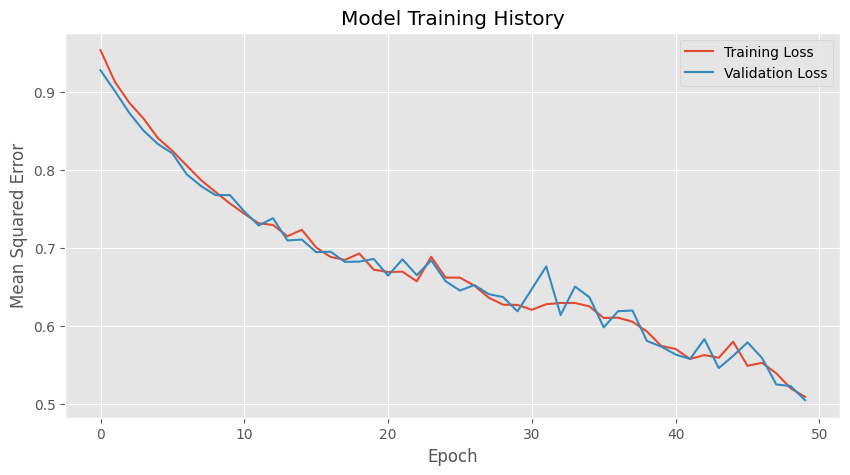

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend()
plt.show()

59/59 [==============================] - 2s 13ms/step


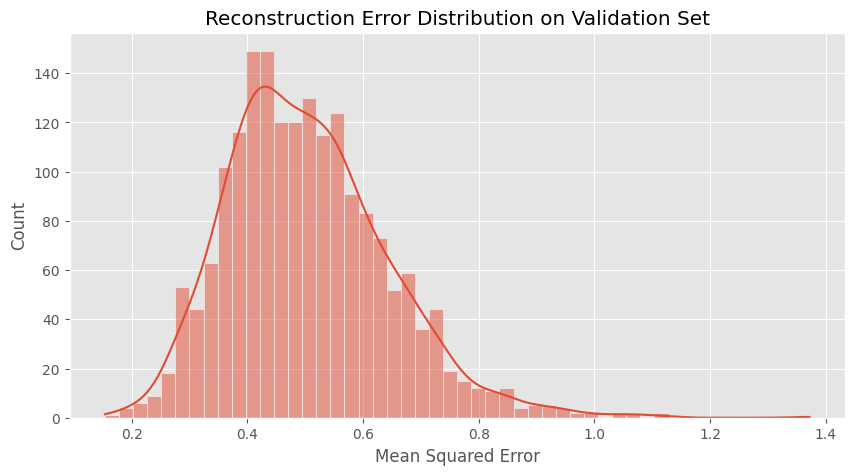

Anomaly threshold (99th percentile): 0.9165


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('best_lstm_autoencoder.h5')

val_reconstructions = model.predict(val_seq)
val_mse = np.mean(np.power(val_seq - val_reconstructions, 2), axis=(1, 2))

plt.figure(figsize=(10, 5))
sns.histplot(val_mse, bins=50, kde=True)
plt.title('Reconstruction Error Distribution on Validation Set')
plt.xlabel('Mean Squared Error')
plt.ylabel('Count')
plt.show()

threshold = np.percentile(val_mse, 99)
print(f"Anomaly threshold (99th percentile): {threshold:.4f}")

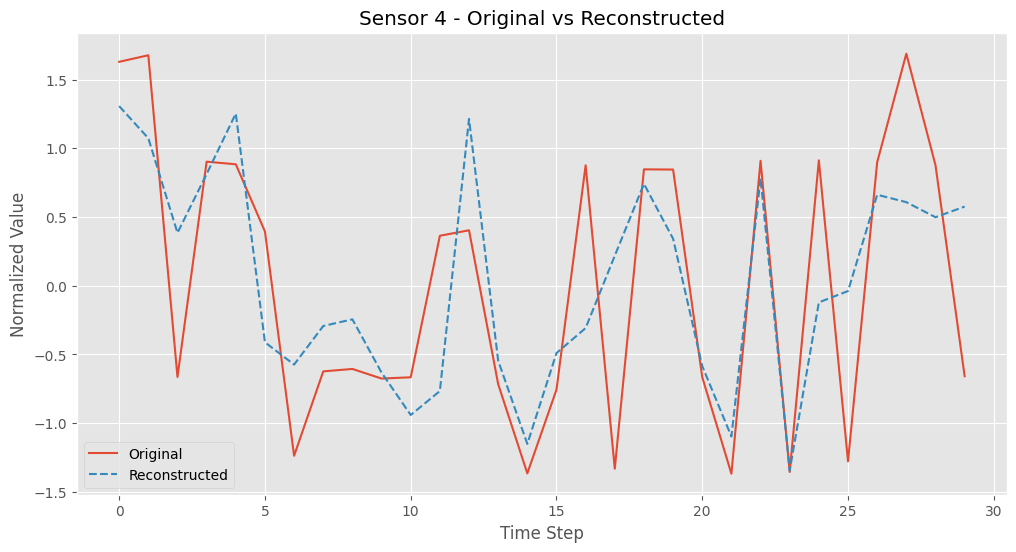

Sequence 1 MSE: 0.5795


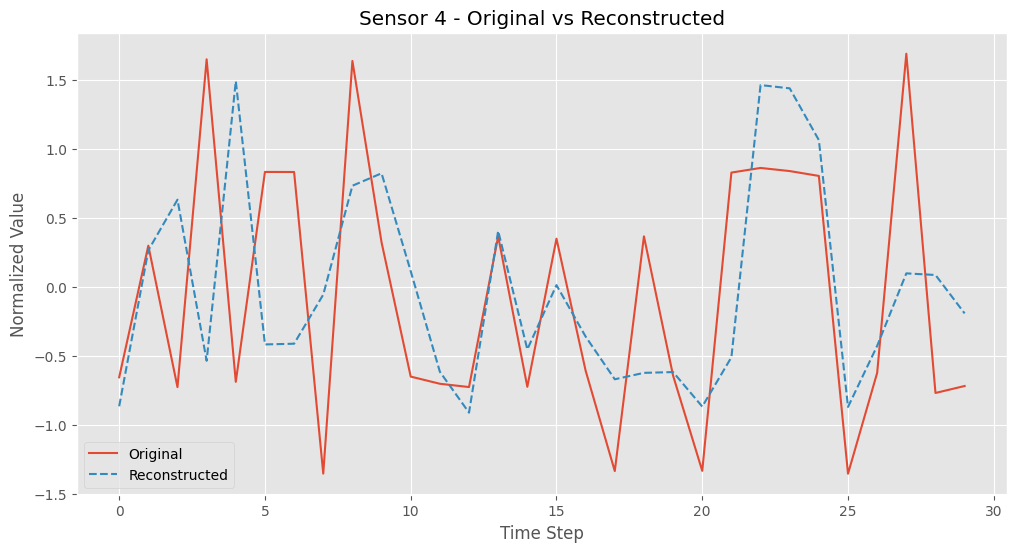

Sequence 2 MSE: 0.8547


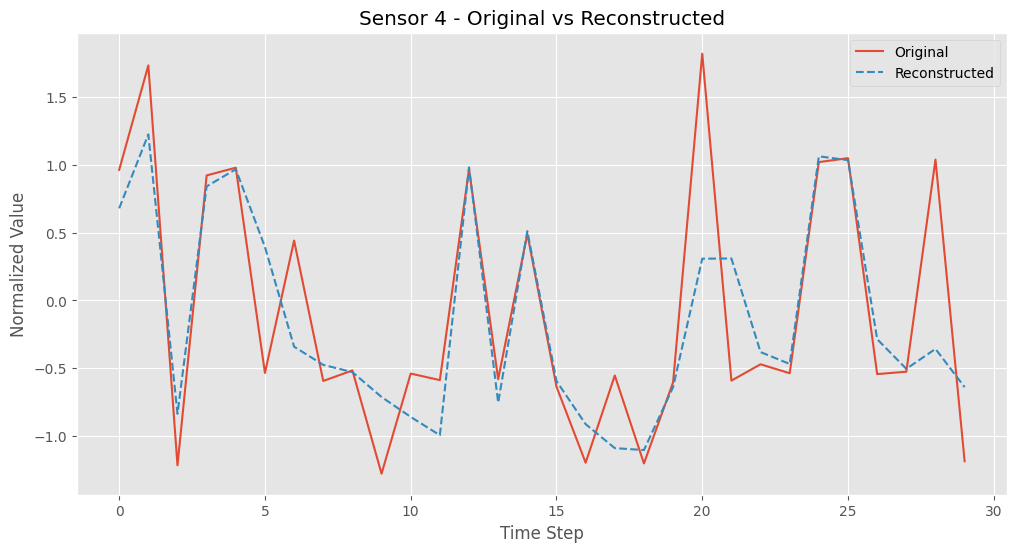

Sequence 3 MSE: 0.3976


In [ ]:
def plot_reconstructions(sequence, reconstruction, sensor_idx=0):
    """Plot original vs reconstructed sensor readings"""
    plt.figure(figsize=(12, 6))
    plt.plot(sequence[:, sensor_idx], label='Original')
    plt.plot(reconstruction[:, sensor_idx], label='Reconstructed', linestyle='--')
    plt.title(f'Sensor {sensor_idx+1} - Original vs Reconstructed')
    plt.xlabel('Time Step')
    plt.ylabel('Normalized Value')
    plt.legend()
    plt.show()

for i in range(3):
    plot_reconstructions(val_seq[i], val_reconstructions[i], sensor_idx=3)
    mse = np.mean(np.power(val_seq[i] - val_reconstructions[i], 2))
    print(f"Sequence {i+1} MSE: {mse:.4f}")

### 4. Anomaly Detection on Test Data

In [ ]:
import joblib
test_data = pd.read_csv('test_FD002.txt', sep='\s+', header=None, names=column_names)
rul_data = pd.read_csv('RUL_FD002.txt', sep='\s+', header=None, names=['RUL'])

test_data = test_data.drop(columns=list(set(column_names) - set(train_data.columns)))

sensor_cols = [col for col in test_data.columns if 'sensor_' in col]
scaler = joblib.load('standard_scaler.save')
test_data[sensor_cols] = scaler.transform(test_data[sensor_cols])

test_sequences = create_sequences(test_data, sequence_length, step_size)

print(f"Test sequences shape: {test_sequences.shape}")

Test sequences shape: (5346, 30, 20)


In [ ]:
test_reconstructions = model.predict(test_sequences)

test_mse = np.mean(np.power(test_sequences - test_reconstructions, 2), axis=(1, 2))

anomalies = (test_mse > threshold).astype(int)
print(f"Detected {sum(anomalies)} anomalies in test data ({sum(anomalies)/len(anomalies):.2%})")

results = pd.DataFrame({
    'sequence_index': range(len(test_mse)),
    'mse': test_mse,
    'anomaly': anomalies
})

168/168 [==============================] - 2s 14ms/step
Detected 43 anomalies in test data (0.80%)


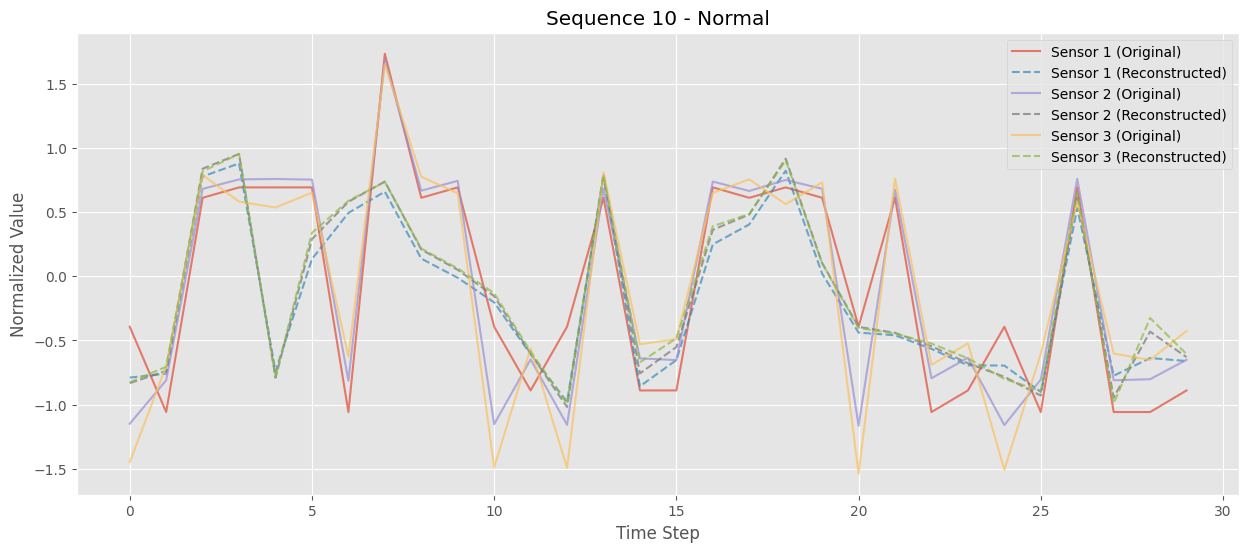

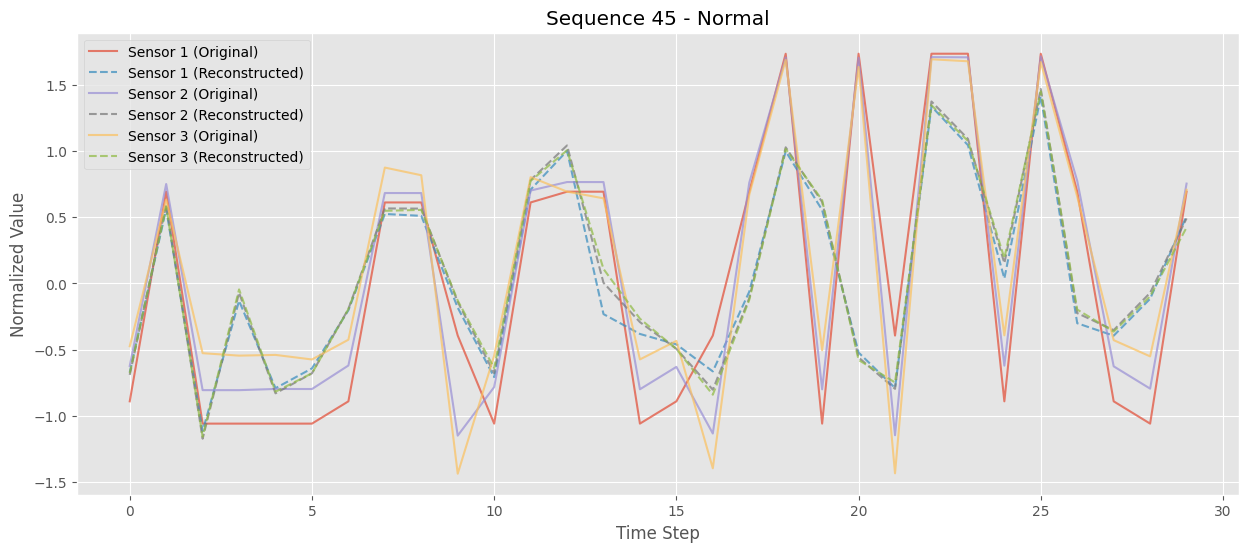

In [ ]:
def plot_anomalies(sequence_idx):
    """Plot a sequence with anomaly indication"""
    seq = test_sequences[sequence_idx]
    recon = test_reconstructions[sequence_idx]
    is_anomaly = anomalies[sequence_idx]
    
    plt.figure(figsize=(15, 6))
    for i in range(3):
        plt.plot(seq[:, i], label=f'Sensor {i+1} (Original)', alpha=0.7)
        plt.plot(recon[:, i], label=f'Sensor {i+1} (Reconstructed)', linestyle='--', alpha=0.7)
    
    if is_anomaly:
        plt.axvspan(0, len(seq), color='red', alpha=0.1, label='Anomaly')
    
    plt.title(f"Sequence {sequence_idx} - {'ANOMALY' if is_anomaly else 'Normal'}")
    plt.xlabel('Time Step')
    plt.ylabel('Normalized Value')
    plt.legend()
    plt.show()

plot_anomalies(10)
plot_anomalies(45)

C:\Users\UDIT DAGAR\AppData\Local\Temp\ipykernel_1000\2079189906.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='cycle', y='anomaly', data=results, ci=None)


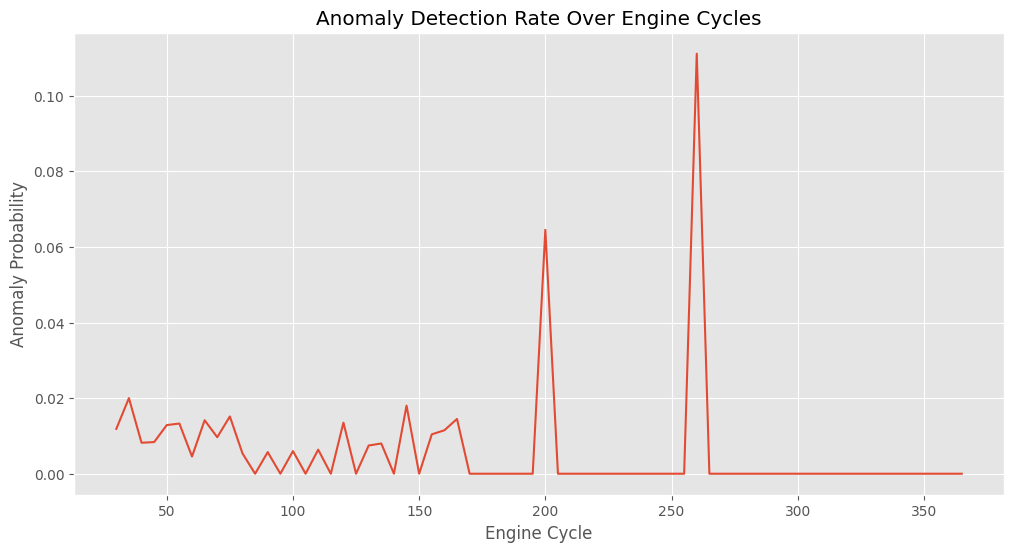

In [ ]:
def get_cycle_positions(test_df, seq_length, step_size):
    """Map sequence indices back to original cycle positions"""
    positions = []
    unit_numbers = test_df['unit_number'].unique()
    
    for unit in unit_numbers:
        unit_cycles = test_df[test_df['unit_number'] == unit]['time_cycles']
        for i in range(0, len(unit_cycles) - seq_length, step_size):
            positions.append(unit_cycles.iloc[i + seq_length - 1])
    return positions

cycle_positions = get_cycle_positions(test_data, sequence_length, step_size)
results['cycle'] = cycle_positions[:len(results)]

plt.figure(figsize=(12, 6))
sns.lineplot(x='cycle', y='anomaly', data=results, ci=None)
plt.title('Anomaly Detection Rate Over Engine Cycles')
plt.xlabel('Engine Cycle')
plt.ylabel('Anomaly Probability')
plt.show()

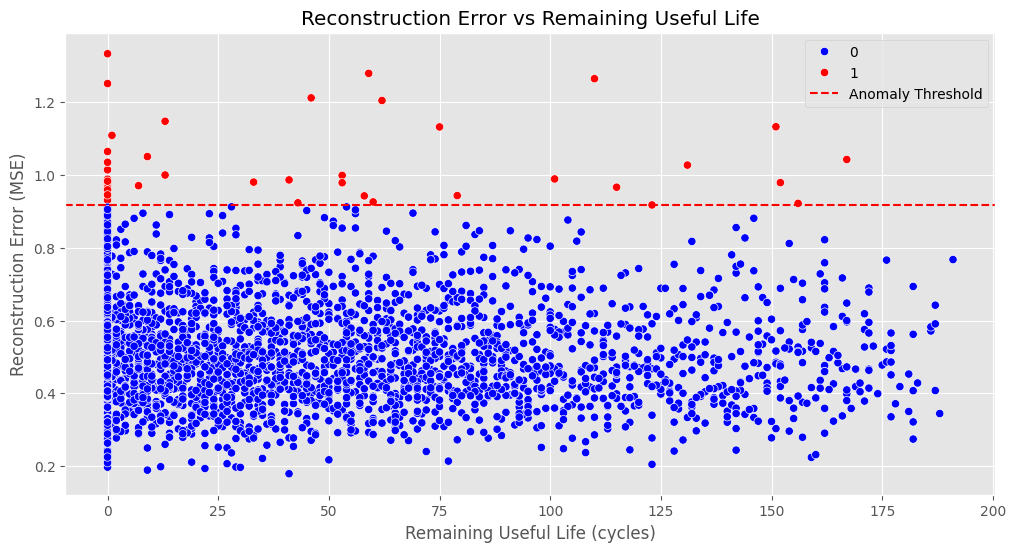

In [ ]:
def get_sequence_rul(test_df, rul_df, seq_length, step_size):
    """Get RUL values corresponding to each sequence"""
    rul_values = []
    unit_numbers = test_df['unit_number'].unique()
    
    for i, unit in enumerate(unit_numbers):
        max_cycle = test_df[test_df['unit_number'] == unit]['time_cycles'].max()
        unit_cycles = test_df[test_df['unit_number'] == unit]['time_cycles']
        
        for j in range(0, len(unit_cycles) - seq_length, step_size):
            last_cycle = unit_cycles.iloc[j + seq_length - 1]
            rul = rul_df.iloc[i, 0] - (max_cycle - last_cycle)
            rul_values.append(max(0, rul))
            
    return rul_values

sequence_rul = get_sequence_rul(test_data, rul_data, sequence_length, step_size)
results['RUL'] = sequence_rul[:len(results)]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='RUL', y='mse', hue='anomaly', data=results, palette={0: 'blue', 1: 'red'})
plt.axhline(threshold, color='red', linestyle='--', label='Anomaly Threshold')
plt.title('Reconstruction Error vs Remaining Useful Life')
plt.xlabel('Remaining Useful Life (cycles)')
plt.ylabel('Reconstruction Error (MSE)')
plt.legend()
plt.show()

Precision: 0.512
Recall: 0.006
F1 Score: 0.012


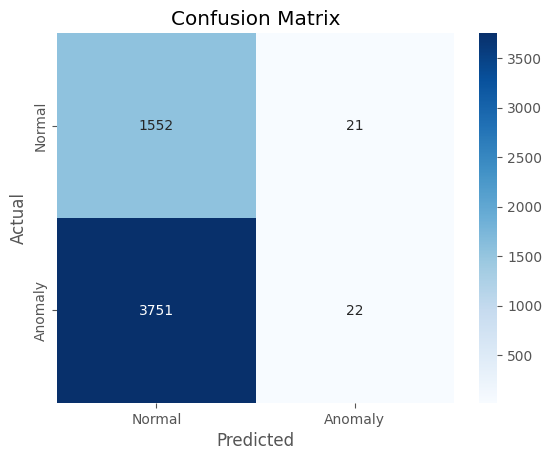

In [ ]:
true_labels = (results['RUL'] < 30).astype(int) 
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(true_labels, anomalies)
recall = recall_score(true_labels, anomalies)
f1 = f1_score(true_labels, anomalies)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

cm = confusion_matrix(true_labels, anomalies)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 5. Model Optimization and Threshold Tuning

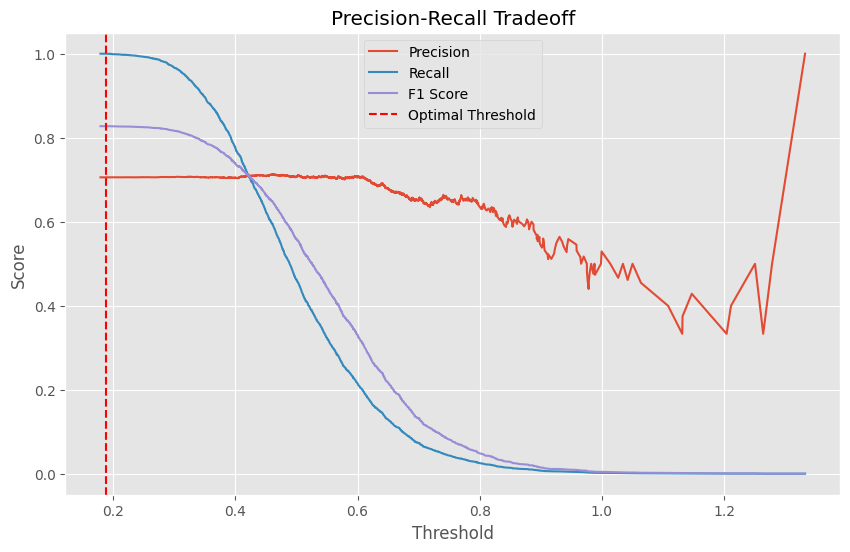

Original Threshold (99th %ile): 0.9165
Optimal Threshold: 0.1890
Optimal F1-Score: 0.8276


In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(true_labels, results['mse'])

f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, f1_scores[:-1], label='F1 Score')
plt.axvline(optimal_threshold, color='red', linestyle='--', label='Optimal Threshold')
plt.title('Precision-Recall Tradeoff')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

print(f"Original Threshold (99th %ile): {threshold:.4f}")
print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Optimal F1-Score: {f1_scores[optimal_idx]:.4f}")

results['optimized_anomaly'] = (results['mse'] > optimal_threshold).astype(int)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
def build_optimized_model(input_shape):
    """Build an improved LSTM Autoencoder architecture"""
    inputs = Input(shape=input_shape)
    
    x = LSTM(128, activation='tanh', return_sequences=True, dropout=0.2)(inputs)
    x = LSTM(64, activation='tanh', return_sequences=True, dropout=0.2)(x)
    x = LSTM(32, activation='tanh', return_sequences=False)(x)
    
    latent = Dense(64, activation='tanh')(x)
    
    x = RepeatVector(input_shape[0])(latent)
    x = LSTM(32, activation='tanh', return_sequences=True, dropout=0.2)(x)
    x = LSTM(64, activation='tanh', return_sequences=True, dropout=0.2)(x)
    x = LSTM(128, activation='tanh', return_sequences=True)(x)
    
    outputs = TimeDistributed(Dense(input_shape[1]))(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')
    return model

optimized_model = build_optimized_model(input_shape)
optimized_model.summary()

optimized_callbacks = [
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    ModelCheckpoint('optimized_lstm_ae.h5', save_best_only=True),
    ReduceLROnPlateau(factor=0.5, patience=3)
]

optimized_history = optimized_model.fit(
    train_seq, train_seq,
    validation_data=(val_seq, val_seq),
    epochs=100,
    batch_size=128,
    callbacks=optimized_callbacks
)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 30, 20)]          0         
                                                                 
 lstm_23 (LSTM)              (None, 30, 128)           76288     
                                                                 
 lstm_24 (LSTM)              (None, 30, 64)            49408     
                                                                 
 lstm_25 (LSTM)              (None, 32)                12416     
                                                                 
 dense_10 (Dense)            (None, 64)                2112      
                                                                 
 repeat_vector_5 (RepeatVect  (None, 30, 64)           0         
 or)                                                             
                                                           

32/32 [==============================] - 0s 14ms/step


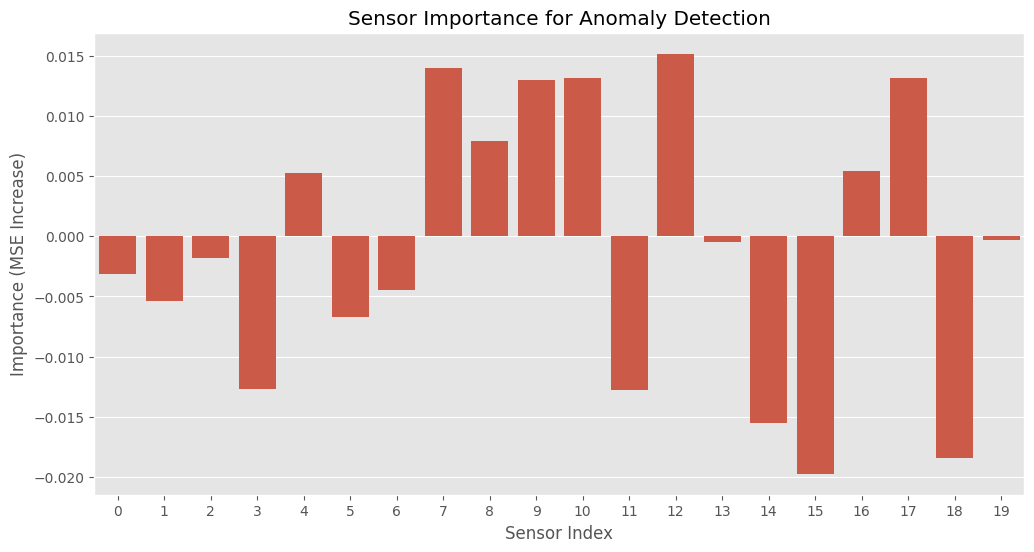

Top 5 most important sensors: [12  7 10 17  9]


In [ ]:
def calculate_feature_importance(model, sequences, num_samples=100):
    """Calculate sensor importance via perturbation analysis"""
    baseline_mse = np.mean(model.predict(sequences), axis=(1, 2))
    importance_scores = np.zeros(sequences.shape[2])
    
    for i in range(sequences.shape[2]):
        perturbed = sequences.copy()
        perturbed[:, :, i] = np.random.permutation(perturbed[:, :, i])
        perturbed_mse = np.mean(model.predict(perturbed), axis=(1, 2))
        importance_scores[i] = np.mean(perturbed_mse - baseline_mse)
    
    return importance_scores

sensor_importance = calculate_feature_importance(model, val_seq[:1000])

plt.figure(figsize=(12, 6))
sns.barplot(x=np.arange(len(sensor_importance)), y=sensor_importance)
plt.title('Sensor Importance for Anomaly Detection')
plt.xlabel('Sensor Index')
plt.ylabel('Importance (MSE Increase)')
plt.show()

top_sensors = np.argsort(sensor_importance)[-5:][::-1]
print(f"Top 5 most important sensors: {top_sensors}")

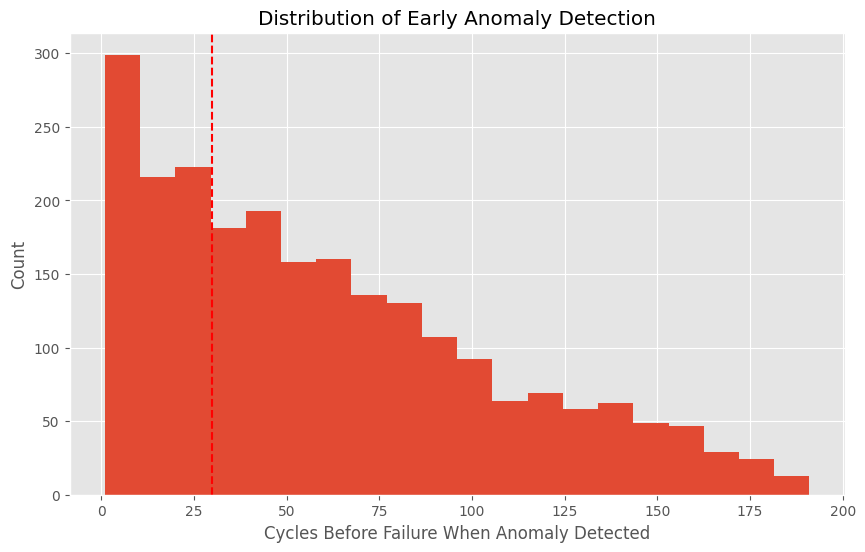

Average early detection: 60.7 cycles before failure
Earliest detection: 1.0 cycles before failure


In [ ]:
def analyze_early_detection(results, rul_threshold=30):
    """Calculate how early anomalies are detected before failure"""
    early_detections = []
    anomaly_indices = results[results['optimized_anomaly'] == 1].index
    
    for idx in anomaly_indices:
        rul = results.iloc[idx]['RUL']
        if rul > 0:
            early_detections.append(rul)
    
    plt.figure(figsize=(10, 6))
    plt.hist(early_detections, bins=20)
    plt.axvline(rul_threshold, color='red', linestyle='--')
    plt.title('Distribution of Early Anomaly Detection')
    plt.xlabel('Cycles Before Failure When Anomaly Detected')
    plt.ylabel('Count')
    plt.show()
    
    avg_early = np.mean(early_detections)
    print(f"Average early detection: {avg_early:.1f} cycles before failure")
    print(f"Earliest detection: {np.min(early_detections):.1f} cycles before failure")

analyze_early_detection(results)


Performance Comparison:
Metric		Original	Optimized
Precision	0.512		0.706
Recall		0.006		1.000
F1 Score	0.012		0.828


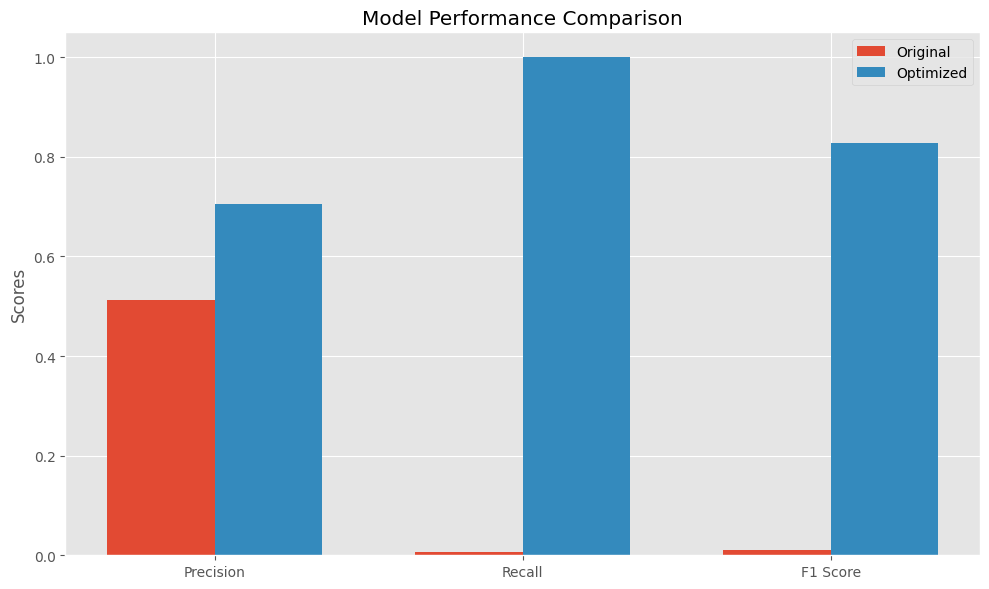

In [ ]:
original_precision = precision_score(true_labels, anomalies)
original_recall = recall_score(true_labels, anomalies)
original_f1 = f1_score(true_labels, anomalies)

optimized_precision = precision_score(true_labels, optimized_anomalies)
optimized_recall = recall_score(true_labels, optimized_anomalies)
optimized_f1 = f1_score(true_labels, optimized_anomalies)

print("\nPerformance Comparison:")
print(f"Metric\t\tOriginal\tOptimized")
print(f"Precision\t{original_precision:.3f}\t\t{optimized_precision:.3f}")
print(f"Recall\t\t{original_recall:.3f}\t\t{optimized_recall:.3f}")
print(f"F1 Score\t{original_f1:.3f}\t\t{optimized_f1:.3f}")

metrics = ['Precision', 'Recall', 'F1 Score']
original_scores = [original_precision, original_recall, original_f1]
optimized_scores = [optimized_precision, optimized_recall, optimized_f1]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, original_scores, width, label='Original')
rects2 = ax.bar(x + width/2, optimized_scores, width, label='Optimized')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()